In [1]:
import pandas as pd
import numpy as np

In [2]:
%pip install xlrd --user

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel("sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [6]:
df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


## Сводные таблицы

In [7]:
pd.pivot_table(df,index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [8]:
pd.pivot_table(df,index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [9]:
pd.pivot_table(df,index=["Manager","Rep"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [10]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [11]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [12]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=[np.mean,len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

In [13]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [14]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [17]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price","Quantity"],
columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                                        \
                              Price                              Quantity   
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

In [18]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],aggfunc=[np.sum],fill_value=0)

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

In [19]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum            mean          
                                          Price Quantity  Price  Quantity
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500  1.000000
                            Maintenance    5000        2   5000  2.000000
                            Software      10000        1  10000  1.000000
              Daniel Hilton CPU          105000        4  52500  2.000000
                            Software      10000        1  10000  1.000000
              John Smith    CPU           35000        1  35000  1.000000
                            Maintenance    5000        2   5000  2.000000
Fred Anderson Cedric Moss   CPU           95000        3  47500  1.500000
                            Maintenance    5000        1   5000  1.000000
                            Software      10000        1  10000  1.000000
              Wendy Yule    CPU          165000        7  82500  3.500000
                            Maintenance    7000        3   7000  3.000000
                            Monitor        5000        2   5000  2.000000
All                                      522000       30  30705  1.764706

In [20]:
pd.pivot_table(df,index=["Manager","Status"],values=["Price"],
               aggfunc=[np.sum],fill_value=0,margins=True)

sum
                          Price
Manager       Status           
Debra Henley  won         65000
              pending     50000
              presented   50000
              declined    70000
Fred Anderson won        172000
              pending      5000
              presented   45000
              declined    65000
All                      522000

In [23]:
pd.pivot_table(df,index=["Manager","Status"],columns=["Product"],values=["Quantity","Price"],
               aggfunc={"Quantity":len,"Price":np.sum},fill_value=0)

Price                                       \
                          len                                  sum   
Product                   CPU Maintenance Monitor Software     CPU   
Manager       Status                                                 
Debra Henley  won           1           0       0        0   65000   
              pending       1           2       0        0   40000   
              presented     1           0       0        2   30000   
              declined      2           0       0        0   70000   
Fred Anderson won           2           1       0        0  165000   
              pending       0           1       0        0       0   
              presented     1           0       1        1   30000   
              declined      1           0       0        0   65000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  won                 0       0        0        1           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              declined            0       0        0        2           0   
Fred Anderson won              7000       0        0        2           1   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              declined            0       0        0        1           0   

                                                                           
                                         sum                               
Product                 Monitor Software CPU Maintenance Monitor Software  
Manager       Status                                                       
Debra Henley  won             0        0   2           0       0        0  
              pending         0        0   2           4       0        0  
              presented       0        2   1           0       0        2  
              declined        0        0   2           0       0        0  
Fred Anderson won             0        0   7           3       0        0  
              pending         0        0   0           1       0        0  
              presented       1        1   1           0       2        1  
              declined        0        0   2           0       0        0

In [24]:
pd.pivot_table(df,index=["Manager","Status"],columns=["Product"],values=["Quantity","Price"],
               aggfunc={len,np.sum},fill_value=0)

Price                                       \
                          len                                  sum   
Product                   CPU Maintenance Monitor Software     CPU   
Manager       Status                                                 
Debra Henley  won           1           0       0        0   65000   
              pending       1           2       0        0   40000   
              presented     1           0       0        2   30000   
              declined      2           0       0        0   70000   
Fred Anderson won           2           1       0        0  165000   
              pending       0           1       0        0       0   
              presented     1           0       1        1   30000   
              declined      1           0       0        0   65000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  won                 0       0        0        1           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              declined            0       0        0        2           0   
Fred Anderson won              7000       0        0        2           1   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              declined            0       0        0        1           0   

                                                                           
                                         sum                               
Product                 Monitor Software CPU Maintenance Monitor Software  
Manager       Status                                                       
Debra Henley  won             0        0   2           0       0        0  
              pending         0        0   2           4       0        0  
              presented       0        2   1           0       0        2  
              declined        0        0   2           0       0        0  
Fred Anderson won             0        0   7           3       0        0  
              pending         0        0   0           1       0        0  
              presented       1        1   1           0       2        1  
              declined        0        0   2           0       0        0

## Melt

In [26]:
df = pd.DataFrame({'Name': {0: 'John', 1: 'Bob', 2: 'Shiela'},
                   'Course': {0: 'Masters', 1: 'Graduate', 2: 'Graduate'},
                   'Age': {0: 27, 1: 23, 2: 21}})
df

,Name,Course,Age
0,John,Masters,27
1,Bob,Graduate,23
2,Shiela,Graduate,21


In [27]:
pd.melt(df, id_vars =['Name'], value_vars =['Course'])

,Name,variable,value
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate


In [28]:
pd.melt(df, id_vars =['Name'], value_vars =['Course', 'Age'])



,Name,variable,value
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate
3,John,Age,27
4,Bob,Age,23
5,Shiela,Age,21


In [29]:
pd.melt(df, id_vars =['Name'], value_vars =['Course'],
              var_name ='ChangedVarname', value_name ='ChangedValname')

,Name,ChangedVarname,ChangedValname
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate


## Регулярные выражения

In [1]:
import re

In [11]:
# Поиск строки в подстроке
# match ищет подстроку в начале строки
result = re.match(r'AV', 'AV Analytics Vidhya AV')
print(result.group(0))

AV


In [17]:
result = re.match(r'AV', 'AV Analytics Vidhya AV')
# вывод позиции начала и окончания
print(result.start())
print(result.end())

0
2


In [12]:
result = re.match(r'Analytics', 'AV Analytics Vidhya AV')
print(result.group(0))

AttributeError: 'NoneType' object has no attribute 'group'

In [18]:
# Поиск подстроки во всей строке
result = re.search(r'Analytics', 'AV Analytics Vidhya AV')
print(result.group(0))

Analytics


In [19]:
# возврат списка вхождений подстроки в строку
result = re.findall(r'AV', 'AV Analytics Vidhya AV')
print(result)

['AV', 'AV']


In [21]:
# Разделение строки по заданному шаблону
result = re.split(r'y', 'Analytics')
print(result)

['Anal', 'tics']


In [26]:
# Указанное кол-во раз
result = re.split(r'i', 'Analytics Vidhya') # default value maxsplit=0
print(result)
result = re.split(r'i', 'Analytics Vidhya',maxsplit=1)
print(result)

['Analyt', 'cs V', 'dhya']
['Analyt', 'cs Vidhya']


In [27]:
# Поиск и замена подстроки на другую
result = re.sub(r'India', 
                'the World', 
                'AV is largest Analytics community of India')
print(result)

AV is largest Analytics community of the World


In [28]:
# Использование как объекта для поиска
pattern = re.compile('AV')
result = pattern.findall('AV Analytics Vidhya AV')
print(result)
result2 = pattern.findall('AV is largest analytics community of India')
print(result2)

['AV', 'AV']
['AV']


## Использование операторов

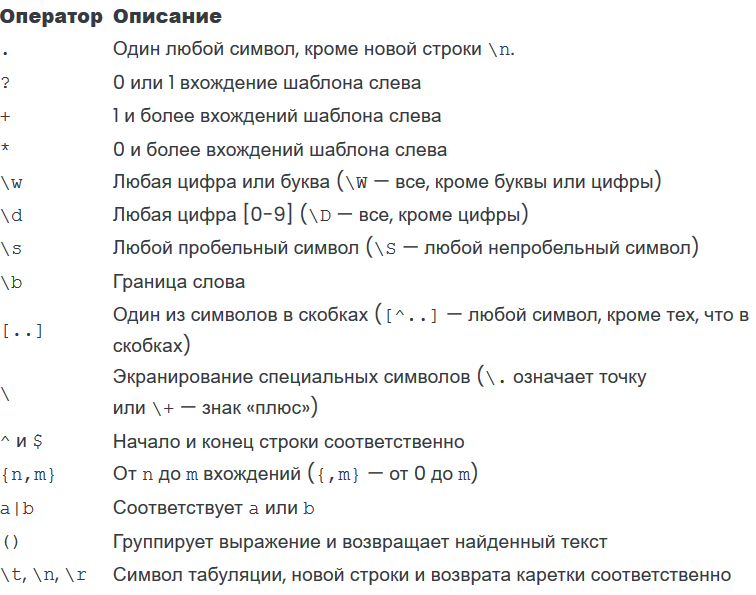

In [30]:
# Разбиение строки на символы ВКЛЮЧАЯ пробелы
result = re.findall(r'.', 'AV is largest Analytics community of India')
print(result)

['A', 'V', ' ', 'i', 's', ' ', 'l', 'a', 'r', 'g', 'e', 's', 't', ' ', 'A', 'n', 'a', 'l', 'y', 't', 'i', 'c', 's', ' ', 'c', 'o', 'm', 'm', 'u', 'n', 'i', 't', 'y', ' ', 'o', 'f', ' ', 'I', 'n', 'd', 'i', 'a']


In [32]:
# Разбиение строки на символы НЕ ВКЛЮЧАЯ пробелы
result = re.findall(r'\w', 'AV is largest Analytics community of India')
print(result)

['A', 'V', 'i', 's', 'l', 'a', 'r', 'g', 'e', 's', 't', 'A', 'n', 'a', 'l', 'y', 't', 'i', 'c', 's', 'c', 'o', 'm', 'm', 'u', 'n', 'i', 't', 'y', 'o', 'f', 'I', 'n', 'd', 'i', 'a']


In [33]:
# На слова с пробелами
result = re.findall(r'\w*', 'AV is largest Analytics community of India')
print(result)

['AV', '', 'is', '', 'largest', '', 'Analytics', '', 'community', '', 'of', '', 'India', '']


In [35]:
# Без пробелов
result = re.findall(r'\w+', 'AV is largest Analytics community of India')
print(result)

['AV', 'is', 'largest', 'Analytics', 'community', 'of', 'India']


In [36]:
# Взять первое слово
result = re.findall(r'^\w+', 'AV is largest Analytics community of India')
print(result)

['AV']


In [38]:
# Взять последнее слово
result = re.findall(r'\w+$', 'AV is largest Analytics community of India')
print(result)

['India']


In [ ]:
# 1)Возврат первых двух симолов каждого слова
result = re.findall(r'\w\w', 'AV is largest Analytics community of India')
print(result)

In [42]:
# 2)С использованием символа границы слова
result = re.findall(r'\b\w.', 'AV is largest Analytics community of India')
print(result)

['AV', 'is', 'la', 'An', 'co', 'of', 'In']


## Возврат списка доменов

In [43]:
# 1)Возврат всех символов после @
result = re.findall(r'@\w+', 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz')
print(result)

['@gmail', '@test', '@analyticsvidhya', '@rest']


In [44]:
result = re.findall(r'@\w+.\w+', 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz')
print(result)

['@gmail.com', '@test.in', '@analyticsvidhya.com', '@rest.biz']


In [45]:
result = re.findall(r'@\w+.(\w+)', 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz')
print(result)

['com', 'in', 'com', 'biz']


## Извлечение даты из строки

In [46]:
result = re.findall(r'\d{2}-\d{2}-\d{4}', 'Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009')
print(result)

['12-05-2007', '11-11-2011', '12-01-2009']


In [47]:
# Только по годам
result = re.findall(r'\d{2}-\d{2}-(\d{4})', 'Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009')
print(result)

['2007', '2011', '2009']


## Извлечение слов начинающихся на глассную

In [48]:
# Извлечение всех слов
result = re.findall(r'\w+', 'AV is largest Analytics community of India')
print(result)

['AV', 'is', 'largest', 'Analytics', 'community', 'of', 'India']


In [50]:
# Извлечение всех слов начинающихся с определенной буквы
result = re.findall(r'[aeiouAEIOU]\w+', 'AV is largest Analytics community of India')
print(result)

['AV', 'is', 'argest', 'Analytics', 'ommunity', 'of', 'India']


In [51]:
# С начала слова
result = re.findall(r'\b[aeiouAEIOU]\w+', 'AV is largest Analytics community of India')
print(result)

['AV', 'is', 'Analytics', 'of', 'India']


In [53]:
# Использование ^ для инвертирования группы
result = re.findall(r'\b[^aeiouAEIOU]\w+', 'AV is largest Analytics community of India')
print(result)

[' is', ' largest', ' Analytics', ' community', ' of', ' India']


In [54]:
# Исключение пробела
result = re.findall(r'\b[^aeiouAEIOU ]\w+', 'AV is largest Analytics community of India')
print(result)

['largest', 'community']


## Разбиение строки по нескольким разделителям

In [55]:
line = 'asdf fjdk;afed,fjek,asdf,foo' # String has multiple delimiters (";",","," ").
result = re.split(r'[;,\s]', line)
print(result)

['asdf', 'fjdk', 'afed', 'fjek', 'asdf', 'foo']


In [56]:
line = 'asdf fjdk;afed,fjek,asdf,foo'
result = re.sub(r'[;,\s]',' ', line)
print(result)

asdf fjdk afed fjek asdf foo


## Извлечение информации из html-файла

In [57]:
test_str = "1NoahEmma2LiamOlivia3MasonSophia4JacobIsabella5WilliamAva6EthanMia7MichaelEmily"
result = re.findall(r'\d([A-Z][A-Za-z]+)([A-Z][A-Za-z]+)', test_str)
print(result)

[('Noah', 'Emma'), ('Liam', 'Olivia'), ('Mason', 'Sophia'), ('Jacob', 'Isabella'), ('William', 'Ava'), ('Ethan', 'Mia'), ('Michael', 'Emily')]


# Домашняя работа

In [65]:
import pandas as pd
mlt = pd.read_csv("data_to_melt.csv", index_col = 0)
mlt

,timestamp,amperage,voltage,pillar
0,2018-04-15 03:00:02,0.25,229.19,28
1,2018-04-15 03:00:03,0.12,258.26,17
2,2018-04-15 03:00:03,0.29,248.17,15
3,2018-04-15 03:00:03,0.27,240.52,18
4,2018-04-15 03:00:03,0.44,239.90,13
5,2018-04-15 03:00:03,0.32,250.61,16
6,2018-04-15 03:00:03,0.27,217.87,27
7,2018-04-15 03:00:03,0.39,244.49,19
8,2018-04-15 03:00:03,0.32,256.73,20
9,2018-04-15 03:00:03,0.22,254.29,36


In [ ]:
 Привести данные к виду “timestamp”, “pillar”, “power” с помощью pd.melt

In [60]:
result = re.findall(r'\b\d{3}-\d{3}-\d{4}', 
                    '145-293-4978, 1234-345-9876, 124-723-769O')
print(result)

['145-293-4978']


In [62]:
my_str = "During the early modern period, mathematics began to develop at an accelerating pace in Western Europe. The development of calculus by Newton and Leibniz in the 17 th century revolutionized mathematics. Leonhard Euler was the most notable mathematician of the 18 th century, contributing numerous theorems and discoveries. Perhaps the foremost mathematician of the 19 th century was the German mathematician Carl Friedrich Gauss, who made numerous contributions to fields such as algebra, analysis, differential geometry, matrix theory, number theory. In the early 20 th century, Kurt Gödel transformed mathematics by publishing his incompleteness theorems, which show that any axiomatic system that is consistent will contain unprovable propositions"
result = re.findall(r'[1234567890]\w+', my_str)
print(result)

['17', '18', '19', '20']
